In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. CIFAR 10 (MobileNet)

## 1.1 Symmetric

In [140]:
result_dir = "./save/cifar10/"

dataset = 'cifar'
model = 'cnn'
epochs = 100
frac = 0.1
iid = False
lr = 0.1

### No LNL

Clean 51.16 36.59
FedAvg(0.1) 47.34 35.61
FedAvg(0.2) 41.09 32.43
FedAvg(0.3) 37.29 29.81
FedAvg(0.4) 32.13 25.63
FedAvg(0.5) 28.15 23.18


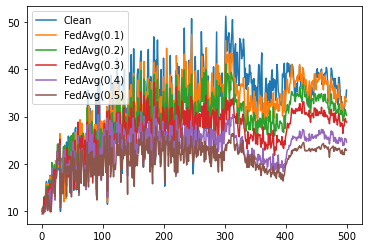

In [143]:
f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv"
acc = pd.read_csv(result_dir + "No_LNL/IID_False/clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='Clean')
print('Clean', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# Symmetric Noise
for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:

    f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[symmetric]_NGN[[100]]_GNR[[{}]]_PT[label2].csv".format(noise_rate)
    acc = pd.read_csv(result_dir + "No_LNL/IID_False/symmetric/" + f)['test_acc']
    
    x = range(1, 501)
    plt.plot(x, acc, label='FedAvg({})'.format(noise_rate))
    print('FedAvg({})'.format(noise_rate), round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

### No LNL (FedProx)

Clean 51.49 38.22
FedProx(0.1) 45.5 34.46
FedProx(0.2) 39.94 30.87
FedProx(0.3) 35.8 23.84
FedProx(0.4) 32.77 20.64
FedProx(0.5) 28.75 18.85


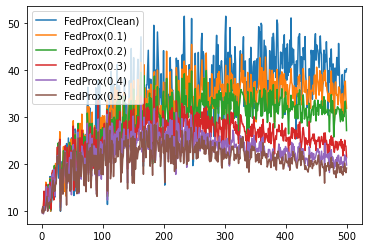

In [121]:
# f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv"
# acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

# x = range(1, 501)
# plt.plot(x, acc, label='Clean')
# print('Clean', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# f = "fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv"
# acc = pd.read_csv(result_dir + "FedProx/IID_False/clean/" + f)['test_acc']

f = "fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv"
acc = pd.read_csv(result_dir + "FedProx/IID_False/clean_10_times/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='FedProx(Clean)')
print('Clean', round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))

# Symmetric Noise
for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:

    f = "fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[symmetric]_NGN[[100]]_GNR[[{}]].csv".format(noise_rate)
    acc = pd.read_csv(result_dir + "FedProx/IID_False/symmetric/mu=0.01/" + f)['test_acc']
    
    x = range(1, 501)
    plt.plot(x, acc, label='FedProx({})'.format(noise_rate))
    print('FedProx({})'.format(noise_rate), round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

### Co-Teaching

In [130]:
f = "fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv"
acc = pd.read_csv(result_dir + "FedProx/IID_False/clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='FedProx(Clean)')
print('Clean', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

FileNotFoundError: [Errno 2] File ./save/cifar10/FedProx/IID_False/clean/fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv does not exist: './save/cifar10/FedProx/IID_False/clean/fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv'

Clean 51.49 39.74
Co-Teaching(0.1) 50.0 37.67
Co-Teaching(0.2) 49.12 38.57
Co-Teaching(0.3) 50.97 39.69
Co-Teaching(0.4) 48.66 39.72
Co-Teaching(0.5) 45.7 38.35
Co-Teaching(0.6) 37.11 30.75


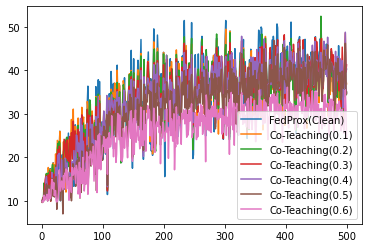

In [129]:
# f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv"
# acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

# x = range(1, 501)
# plt.plot(x, acc, label='Clean')
# print('Clean', round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


f = "fedprox_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv"
acc = pd.read_csv(result_dir + "FedProx/IID_False/clean_10_times/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='FedProx(Clean)')
print('Clean', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


# Symmetric Noise
for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:

    # Co-Teaching
    f = "coteaching_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[symmetric]_NGN[[100]]_GNR[[{}]]_Tk[100]_FR[{}].csv".format(noise_rate, noise_rate)
    acc_lst1 = pd.read_csv(result_dir + "coteaching/symmetric/IID_False/" + f)['test_acc1'].tolist()
    acc_lst2 = pd.read_csv(result_dir + "coteaching/symmetric/IID_False/" + f)['test_acc2'].tolist()
    
    acc_lst = []
       
    for acc1, acc2 in zip(acc_lst1, acc_lst2):
        acc_lst.append((acc1 + acc2) / 2)
        

    x = range(1, 501)
    plt.plot(x, acc_lst1, label='Co-Teaching({})'.format(noise_rate))
    print('Co-Teaching({})'.format(noise_rate), round(max(acc_lst2), 2), round(np.array(acc_lst2[450:]).mean(), 2))
#     plt.plot(x, acc_lst2, label='Co-Teaching({})'.format(noise_rate))
#     print('Co-Teaching({})'.format(noise_rate), round(max(acc_lst), 2), round(np.array(acc_lst[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

Clean 51.2 38.19
Co-Teaching(0.15) 47.47 36.3
Co-Teaching(0.25) 46.5 37.43
Co-Teaching(0.35) 43.23 35.2
Co-Teaching(0.45) 37.99 32.47


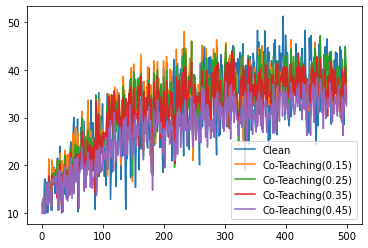

In [115]:
f = "fed_cifar_mobile_500_C[0.1]_IID[False]_LR[0.1]_MMT[0.5]_RP[False].csv"
acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='Clean')
print('Clean', round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


# Symmetric Noise
for noise_rate in [0.15, 0.25, 0.35, 0.45]:

    # Co-Teaching
    f = "coteaching_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[pairflip]_NGN[[100]]_GNR[[{}]]_Tk[100]_FR[{}].csv".format(noise_rate, noise_rate)
    acc_lst1 = pd.read_csv(result_dir + "coteaching/pairflip/IID_False/" + f)['test_acc1'].tolist()
    acc_lst2 = pd.read_csv(result_dir + "coteaching/pairflip/IID_False/" + f)['test_acc2'].tolist()
    
    acc_lst = []
       
    for acc1, acc2 in zip(acc_lst1, acc_lst2):
        acc_lst.append((acc1 + acc2) / 2)
        

    x = range(1, 501)
#     plt.plot(x, acc_lst1, label='Co-Teaching({})'.format(noise_rate))
#     print('Co-Teaching({})'.format(noise_rate), round(max(acc_lst1), 2), round(np.array(acc_lst1[450:]).mean(), 2))
    plt.plot(x, acc_lst2, label='Co-Teaching({})'.format(noise_rate))
    print('Co-Teaching({})'.format(noise_rate), round(max(acc_lst), 2), round(np.array(acc_lst[480:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

### LG-Finetuning

Clean 51.15 35.0
LG-Finetuning(0.1) 48.64 37.87
LG-Finetuning(0.2) 48.49 37.44
LG-Finetuning(0.3) 47.89 37.19
LG-Finetuning(0.4) 47.51 36.03
LG-Finetuning(0.5) 43.41 34.23


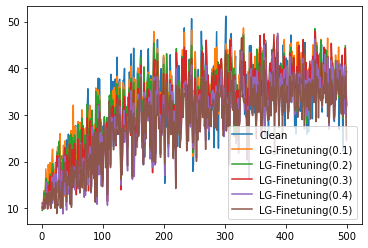

In [118]:
f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv"
acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='Clean')
print('Clean', round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


# Symmetric Noise
for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:

    f = "cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[symmetric]_NGN[[100]]_GNR[[{}]]_PT[label2].csv".format(noise_rate)
    acc = pd.read_csv(result_dir + "LG_finetuning/symmetric/" + f)['test_acc'].tolist()
    
    x = range(1, len(acc)+1)
    plt.plot(x, acc, label='LG-Finetuning({})'.format(noise_rate))
    print('LG-Finetuning({})'.format(noise_rate), round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

## 1.2 Pairflip

### No LNL

Clean 51.15 36.43
FedAvg(0.15) 45.43 36.96
FedAvg(0.25) 44.44 35.22
FedAvg(0.35) 38.61 30.0
FedAvg(0.45) 33.77 27.04


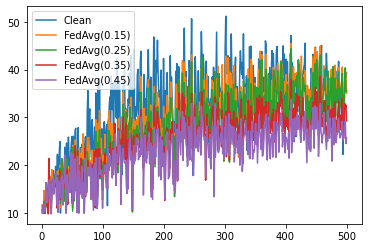

In [49]:
f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv"
acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='Clean')
print('Clean', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# Symmetric Noise
for noise_rate in [0.15, 0.25, 0.35, 0.45]:

    f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[pairflip]_NGN[[100]]_GNR[[{}]].csv".format(noise_rate)
    acc = pd.read_csv(result_dir + "No_LNL/IID_False/pairflip/" + f)['test_acc']
    
    x = range(1, 501)
    plt.plot(x, acc, label='FedAvg({})'.format(noise_rate))
    print('FedAvg({})'.format(noise_rate), round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

### Co-Teaching

Clean 51.15 36.43
Co-Teaching(0.15) 48.03 37.08
Co-Teaching(0.25) 47.18 38.85
Co-Teaching(0.35) 43.95 35.91
Co-Teaching(0.45) 38.31 33.15


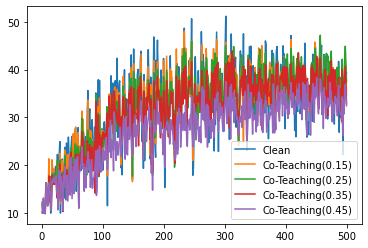

In [70]:
f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv"
acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='Clean')
print('Clean', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


# Symmetric Noise
for noise_rate in [0.15, 0.25, 0.35, 0.45]:

    # Co-Teaching
    f = "coteaching_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[pairflip]_NGN[[100]]_GNR[[{}]]_Tk[100]_FR[{}].csv".format(noise_rate, noise_rate)
    acc_lst1 = pd.read_csv(result_dir + "coteaching/pairflip/IID_False/" + f)['test_acc1'].tolist()
    acc_lst2 = pd.read_csv(result_dir + "coteaching/pairflip/IID_False/" + f)['test_acc2'].tolist()
    
    acc_lst = []
       
    for acc1, acc2 in zip(acc_lst1, acc_lst2):
        acc_lst.append(max(acc1, acc2))
        

    x = range(1, 501)
#     plt.plot(x, acc_lst1, label='Co-Teaching({})'.format(noise_rate))
#     print('Co-Teaching({})'.format(noise_rate), round(max(acc_lst1), 2), round(np.array(acc_lst1[450:]).mean(), 2))

    plt.plot(x, acc_lst2, label='Co-Teaching({})'.format(noise_rate))
    print('Co-Teaching({})'.format(noise_rate), round(max(acc_lst2), 2), round(np.array(acc_lst2[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

### LG-Finetuning

Clean 51.15 35.0
LG-Finetuning(0.15) 47.28 34.72
LG-Finetuning(0.25) 44.69 35.27
LG-Finetuning(0.35) 37.44 29.02
LG-Finetuning(0.45) 30.26 22.74


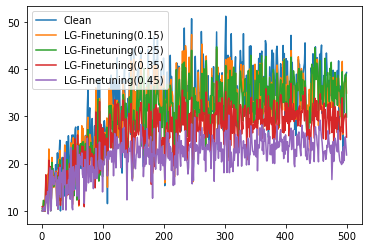

In [126]:
f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv"
acc = pd.read_csv(result_dir + "clean/" + f)['test_acc']

x = range(1, 501)
plt.plot(x, acc, label='Clean')
print('Clean', round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


# Symmetric Noise
for noise_rate in [0.15, 0.25, 0.35, 0.45]:

    f = "cifar_mobile_500_C[0.1]_BS[50]_LE[2]_IID[False]_LR[0.1]_MMT[0.5]_NT[pairflip]_NGN[[100]]_GNR[[{}]]_PT[label2].csv".format(noise_rate)
    acc = pd.read_csv(result_dir + "LG_finetuning/pairflip/" + f)['test_acc'].tolist()
    
    x = range(1, len(acc)+1)
    plt.plot(x, acc, label='LG-Finetuning({})'.format(noise_rate))
    print('LG-Finetuning({})'.format(noise_rate), round(max(acc), 2), round(np.array(acc[480:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

# 2. CIFAR 10 (Simple CNN)

## 2.1 Clean

### 2.1 IID

FedAvg(local_ep=2) 63.3 62.66
FedAvg(local_ep=5) 68.24 67.76
FedAvg(local_ep=10) 67.46 66.76


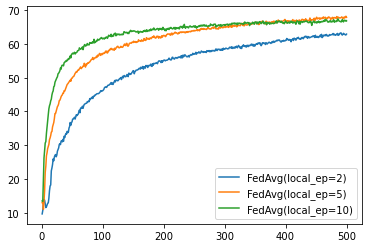

In [162]:
# Symmetric Noise
for local_ep in [2, 5, 10]:

    f = "fedLNL_cifar_cnn_500_C[0.1]_BS[50]_LE[{}]_IID[True]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv".format(local_ep)
    acc = pd.read_csv(result_dir + "No_LNL/IID_True/clean/" + f)['test_acc']
    
    x = range(1, len(acc)+1)
    plt.plot(x, acc, label='FedAvg(local_ep={})'.format(local_ep))
    print('FedAvg(local_ep={})'.format(local_ep), round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

FedAvg(local_ep=2) 51.65 43.95
FedAvg(local_ep=5) 58.32 50.38
FedAvg(local_ep=10) 58.34 52.76


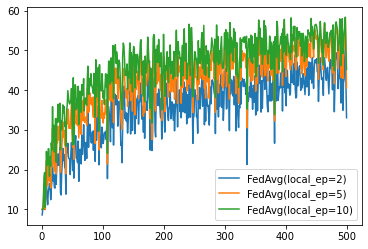

In [163]:
# Symmetric Noise
for local_ep in [2, 5, 10]:

    f = "fedLNL_cifar_cnn_500_C[0.1]_BS[50]_LE[{}]_IID[False]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv".format(local_ep)
    acc = pd.read_csv(result_dir + "No_LNL/IID_False/clean/" + f)['test_acc']
    
    x = range(1, len(acc)+1)
    plt.plot(x, acc, label='FedAvg(local_ep={})'.format(local_ep))
    print('FedAvg(local_ep={})'.format(local_ep), round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

## 2.2 Sysmmetric (Shard per user = 2)

FedAvg(clean) 58.34 52.76
FedAvg(0.1) 44.86 32.08
FedAvg(0.2) 39.94 25.6
FedAvg(0.3) 37.19 22.05
FedAvg(0.4) 36.49 18.9
FedAvg(0.5) 33.84 17.99


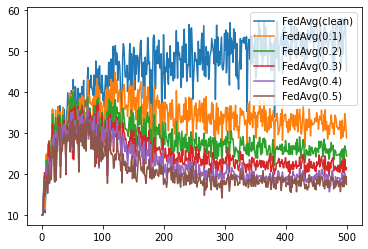

In [169]:
f = "fedLNL_cifar_cnn_500_C[0.1]_BS[50]_LE[10]_IID[False]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv"
acc = pd.read_csv(result_dir + "No_LNL/IID_False/clean/" + f)['test_acc']

x = range(1, len(acc)+1)
plt.plot(x, acc, label='FedAvg(clean)'.format(local_ep))
print('FedAvg(clean)'.format(local_ep), round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# Symmetric Noise
for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
    f = "fedLNL_cifar_cnn_500_C[0.1]_BS[50]_LE[10]_IID[False]_LR[0.01]_MMT[0.5]_NT[symmetric]_NGN[[100]]_GNR[[{}]]_PT[label2].csv".format(noise_rate)
    acc = pd.read_csv(result_dir + "No_LNL/IID_False/symmetric/" + f)['test_acc']
    
    x = range(1, len(acc)+1)
    plt.plot(x, acc, label='FedAvg({})'.format(noise_rate))
    print('FedAvg({})'.format(noise_rate), round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))


plt.legend()
plt.show()
print("\n" * 2)
plt.close()

# 3. CIFAR 10 (4 Conv)

## 3.1 Clean

### 3.1.1 IID

4conv 83.1 82.77
2conv 67.46 66.76


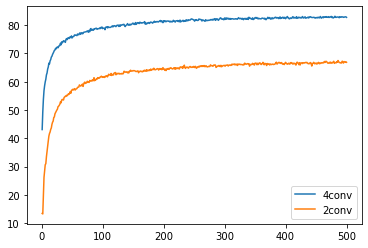

In [184]:
# 4 Conv
f = "fedLNL_cifar_cnn4conv_500_C[0.1]_BS[50]_LE[10]_IID[True]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv".format(local_ep)
acc = pd.read_csv(result_dir + "No_LNL/IID_True/clean/" + f)['test_acc']

x = range(1, len(acc)+1)
plt.plot(x, acc, label='4conv')
print('4conv', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# 2 Conv
f = "fedLNL_cifar_cnn_500_C[0.1]_BS[50]_LE[10]_IID[True]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]].csv".format(local_ep)
acc = pd.read_csv(result_dir + "No_LNL/IID_True/clean/" + f)['test_acc']

x = range(1, len(acc)+1)
plt.plot(x, acc, label='2conv')
print('2conv', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# MobileNet
# f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[10]_IID[False]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv".format(local_ep)
# acc = pd.read_csv(result_dir + "No_LNL/IID_True/clean/" + f)['test_acc']

# x = range(1, len(acc)+1)
# plt.plot(x, acc, label='MobileNet')
# print('MobileNet', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

plt.legend()
plt.show()
print("\n" * 2)
plt.close()

### 3.1.2 Non-IID

4conv 72.32 65.64
2conv 58.34 52.76
MobileNet 40.88 nan


<ipython-input-185-9a5e681f5045>:23: RuntimeWarning: Mean of empty slice.
  print('MobileNet', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))
/home/osilab4/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


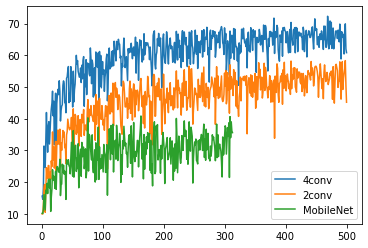

In [185]:
# 4 Conv
f = "fedLNL_cifar_cnn4conv_500_C[0.1]_BS[50]_LE[10]_IID[False]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv".format(local_ep)
acc = pd.read_csv(result_dir + "No_LNL/IID_False/clean/" + f)['test_acc']

x = range(1, len(acc)+1)
plt.plot(x, acc, label='4conv')
print('4conv', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# 2 Conv
f = "fedLNL_cifar_cnn_500_C[0.1]_BS[50]_LE[10]_IID[False]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv".format(local_ep)
acc = pd.read_csv(result_dir + "No_LNL/IID_False/clean/" + f)['test_acc']

x = range(1, len(acc)+1)
plt.plot(x, acc, label='2conv')
print('2conv', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

# MobileNet
f = "fedLNL_cifar_mobile_500_C[0.1]_BS[50]_LE[10]_IID[False]_LR[0.01]_MMT[0.5]_NT[clean]_NGN[[100]]_GNR[[0.2]]_PT[label2].csv".format(local_ep)
acc = pd.read_csv(result_dir + "No_LNL/IID_False/clean/" + f)['test_acc']

x = range(1, len(acc)+1)
plt.plot(x, acc, label='MobileNet')
print('MobileNet', round(max(acc), 2), round(np.array(acc[450:]).mean(), 2))

plt.legend()
plt.show()
print("\n" * 2)
plt.close()